In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


In [47]:
from tensorflow.keras.datasets import mnist


In [48]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
single_image = x_train[0]

In [51]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

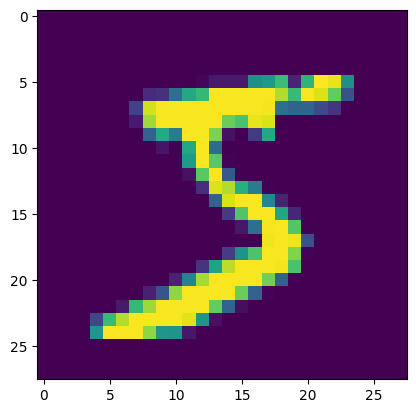

In [52]:
plt.imshow(single_image)

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
y_example = to_categorical(y_train)

In [55]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [56]:
y_cat_test = to_categorical(y_test)

In [57]:
y_cat_train = to_categorical(y_train)

In [58]:
single_image.max()

np.uint8(255)

In [59]:
single_image.min()

np.uint8(0)

In [60]:
x_train = x_train/255

In [61]:
x_test = x_test/255


In [62]:
scaled_image = x_train[0]

In [63]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

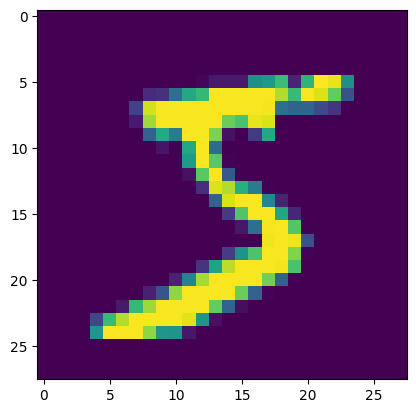

In [64]:
plt.imshow(scaled_image)

In [65]:
x_train.shape

(60000, 28, 28)

In [66]:
#batch size, width, height, color_channels          
x_train = x_train.reshape(60000,28,28,1)

In [67]:
x_test = x_test.reshape(10000,28,28,1)

In [68]:
from tensorflow.keras.models import Sequential

In [69]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [70]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4), input_shape = (28,28,1),activation = 'relu'))

/Users/shilpabhandari/mnist analysis/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.add(MaxPool2D(pool_size=(2,2)))

In [72]:
model.add(Flatten())

In [73]:
model.add(Dense(128, activation = 'relu'))

In [74]:
#output layer 
model.add(Dense(10,activation = 'softmax'))

In [75]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 1)

In [78]:
model.fit(x_train,y_cat_train,epochs = 10, validation_data=(x_test,y_cat_test),
callbacks  = [early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9144 - loss: 0.2828 - val_accuracy: 0.9807 - val_loss: 0.0620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9859 - val_loss: 0.0435
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9870 - val_loss: 0.0370
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.9861 - val_loss: 0.0438


In [79]:
metrics = pd.DataFrame(model.history.history)

In [80]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.958300,0.138482,0.9807,0.061993
1,0.985033,0.048624,0.9859,0.043515
2,0.990417,0.030321,0.9870,0.036953
3,0.993733,0.020296,0.9861,0.043804


<Axes: >

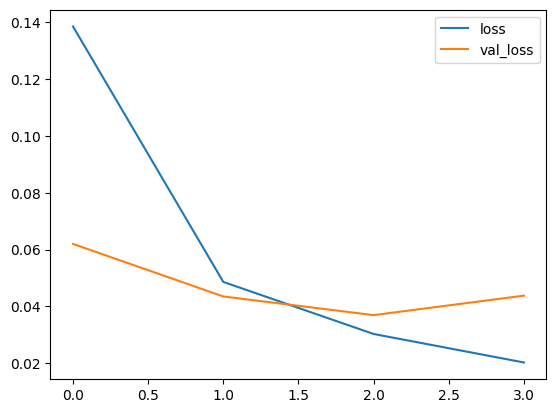

In [81]:
metrics[['loss','val_loss']].plot()

<Axes: >

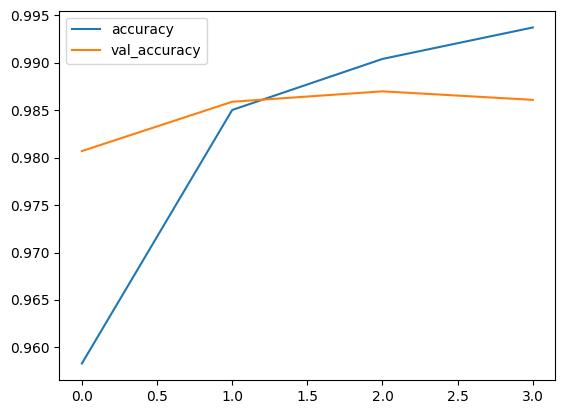

In [82]:
metrics[['accuracy','val_accuracy']].plot()

In [83]:
model.evaluate(x_test,y_cat_test,verbose =0)

[0.04380381852388382, 0.9861000180244446]

In [84]:
from sklearn.metrics import classification_report, confusion_matrix


In [86]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [88]:
y_cat_test.shape

(10000, 10)

In [94]:
predictions = np.argmax(predictions, axis=1)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [98]:
import seaborn as sns

<Axes: >

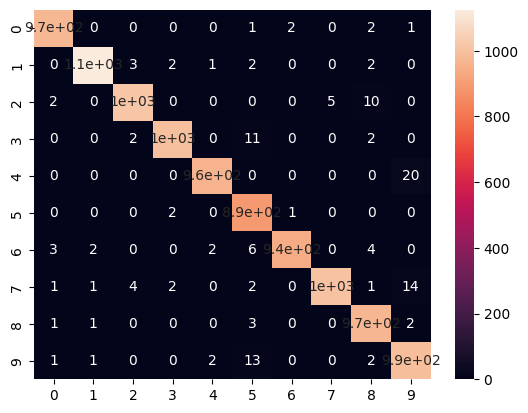

In [100]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [101]:
my_number = x_test[0]

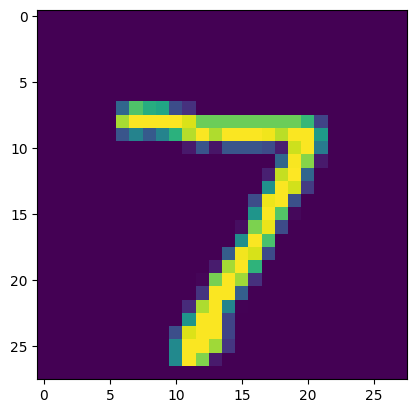

In [103]:
plt.imshow(my_number.reshape(28,28))

In [107]:
sinlge_img_pred = model.predict(my_number.reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [108]:
single_img_pred = np.argmax(sinlge_img_pred, axis=1)

In [109]:
single_img_pred


array([7])